All citations in project readme file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_single_country

In [2]:
CTRY = 'Singapore'

CONFIRMED__COLNAME = 'total'
ACTIVE__COLNAME = 'active'
DISCHARGED__COLNAME = 'discharged'

LAST_DAYS = 21

annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE, adapted from twiecki\nbryan.blackbee', 
    xy=(0.05, 0.01), xycoords='figure fraction', fontsize=10)

In [3]:
df_sg = load_single_country(country=CTRY)

# t_s100: Days after 100 cases have surpassed
t_100cases = df_sg[df_sg.total>100].index.min()
df_sg['t'] = df_sg.index
df_sg['t_s100'] = df_sg['t'].apply(lambda x: x-t_100cases)
df_sg = df_sg[df_sg.t_s100>=0] # Start from t_s100=0

_ = df_sg.reset_index(inplace=True, drop=True)

# total_pct_change_rolling_mean: rolling mean (3 lags) of pct_change in cases
df_sg['total_pct_change'] = df_sg['total'].pct_change()
df_sg['total_pct_change_rolling_mean'] = df_sg['total_pct_change'].rolling(7).mean()


In [4]:
# for testing
df_sg[['date', 'total', 'new', 'total_pct_change', 'total_pct_change_rolling_mean',]].tail(3)

,date,total,new,total_pct_change,total_pct_change_rolling_mean
34,2020-04-03,1114,65,0.061964,0.061973
35,2020-04-04,1189,75,0.067325,0.057930
36,2020-04-05,1309,120,0.100925,0.064867


In [5]:
# Naive predictions: 0%, 2.5%, 5%, 7.5%, 10% growth
t = np.linspace(0, df_sg['t_s100'].max(),df_sg['t_s100'].max()+1)
pcts = np.linspace(0,10,4+1)
# print(pcts)
add_cols = []
for p in pcts:
    t_y = 100 * ((100+p)/100) ** t
    df_sg['predict_{}'.format(p)] = t_y
    add_cols.append('predict_{}'.format(p),)
    
# Naive predictions: growth based on mean of# total_pct_change_rolling_mean
M = df_sg['total_pct_change_rolling_mean'].mean()    
df_sg['rolling_mean'] =100 * ((100+(M*100))/100) ** t
add_cols.append('rolling_mean',)
# print(add_cols)

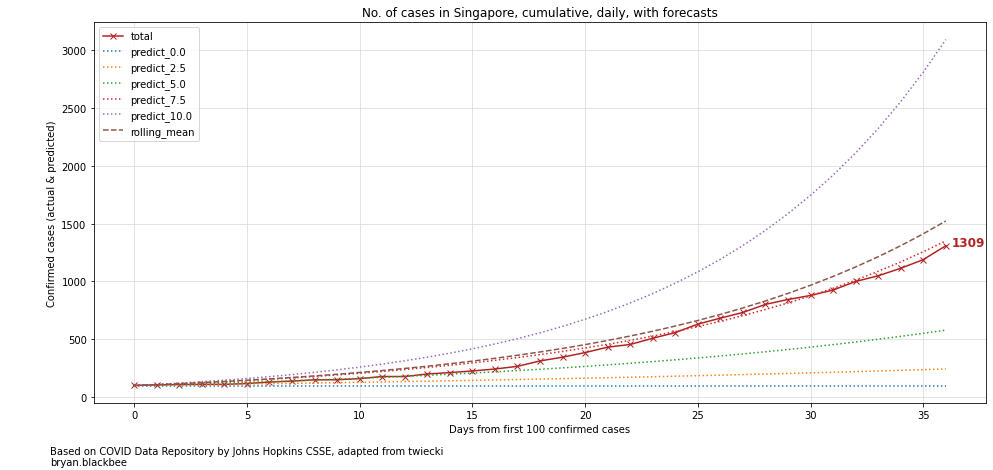

In [6]:
# Plotting case history with forecasts
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total', ax=ax, marker='x', color='FIREBRICK')
for i, a in enumerate(add_cols):
    if i+1==len(add_cols):
        df_sg.plot(kind='line', x='t_s100', y=a, ls='--', ax=ax)
    else:
        df_sg.plot(kind='line', x='t_s100', y=a, ls=':', ax=ax)
l_cfm = df_sg['total'].tail(1).tolist()
for i, v in enumerate(l_cfm):
    ax.text(df_sg['t_s100'].max()+0.25, v, str(v), fontsize=12, fontweight='bold', color='FIREBRICK')
    
ax.set(#yscale='log',
       title="No. of cases in {}, cumulative, daily, with forecasts".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases (actual & predicted)')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()

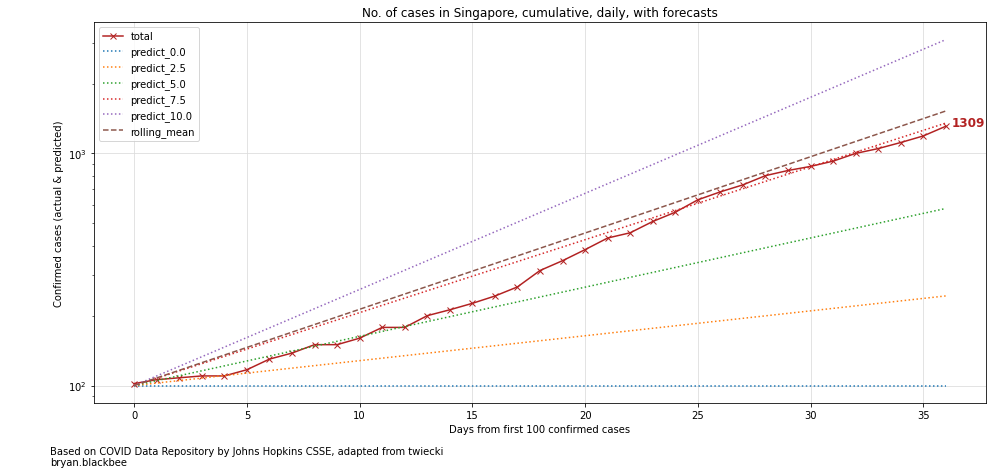

In [7]:
# Plotting case history with forecasts
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total', ax=ax, marker='x', color='FIREBRICK')
for i, a in enumerate(add_cols):
    if i+1==len(add_cols):
        df_sg.plot(kind='line', x='t_s100', y=a, ls='--', ax=ax)
    else:
        df_sg.plot(kind='line', x='t_s100', y=a, ls=':', ax=ax)
l_cfm = df_sg['total'].tail(1).tolist()
for i, v in enumerate(l_cfm):
    ax.text(df_sg['t_s100'].max()+0.25, v, str(v), fontsize=12, fontweight='bold', color='FIREBRICK')
    
ax.set(yscale='log',
       title="No. of cases in {}, cumulative, daily, with forecasts".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases (actual & predicted)')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()

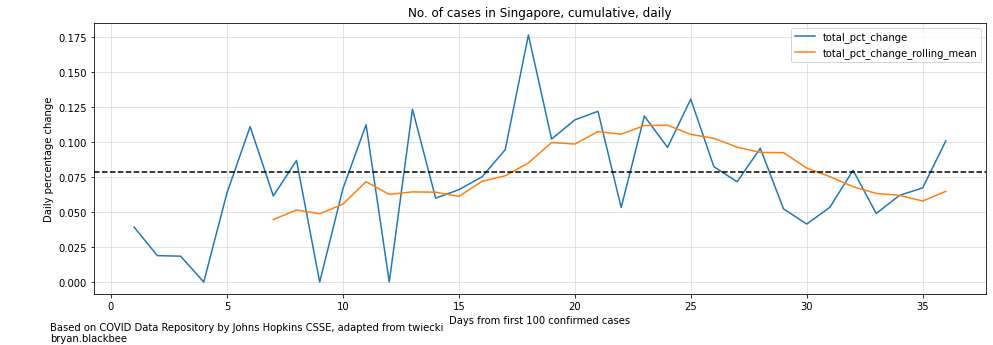

In [8]:
# Plotting growth rate history
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total_pct_change', ax=ax)
df_sg.plot(kind='line', x='t_s100', y='total_pct_change_rolling_mean', ax=ax)
ax.axhline(M, ls='--', color='k')

l_cfm = df_sg['total'].tail(1).tolist()
    
ax.set(#yscale='log',
       title="No. of cases in {}, cumulative, daily".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Daily percentage change')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()
